# Research on computer games success

## Data Overview and Exploration

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

games = pd.read_csv('/home/Yandex Practicum/Projects/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# check the basic information about the data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Cleaning Data

In [3]:
# convert column names to lowercase
games.columns = games.columns.str.lower()

In [4]:
# check number of duplicates
games.duplicated().sum()

0

### Handling missing values

In [5]:
# check number of missing values
games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [6]:
# check % of missing values
test_nan_list = ['name','year_of_release','critic_score', 'user_score', 'rating']
for coln in test_nan_list:
    a = len(games.loc[games[coln].isna(),coln])/len(games[coln])*100
    
    print(coln, a)

name 0.011965300628178284
year_of_release 1.609332934489979
critic_score 51.31917439425665
user_score 40.08973975471134
rating 40.478612025127134


In [7]:
# delete low number of missing values
games = games.loc[~games['name'].isna()]
games = games.loc[~games['year_of_release'].isna()]
games.reset_index(drop=True,inplace=True)

In three columns, missing values make up a significant portion (40-50%), so simply deleting them won't be possible. Let's examine each column in more detail and see if we can replace the missing values.

In [8]:
print(games['critic_score'].unique())
print('---')
print(games['user_score'].unique())
print('---')
print(games['rating'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
---
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
---
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In the column with user reviews, in addition to missing values, the value 'tbd' was found, which may mean "to be determined." Consequently, we can replace this notation with a missing value since the rating is yet to be determined.

However, replacing such a volume of missing values in the columns without loss of accuracy is unlikely. Let's leave the missing values as they are.

In [9]:
# replace tbd with NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

### Data type conversion

In [10]:
# convert to integers
games['year_of_release'] = np.ceil(games['year_of_release']).astype(int)
# handle the remaining missing values
games.loc[~games['critic_score'].isna(),'critic_score'] = \
np.ceil(games.loc[~games['critic_score'].isna(),'critic_score']).astype(int)
# convert to floating-point numbers
games['user_score'] = pd.to_numeric(games['user_score'])

### Removing duplicates and outliers

**Check for duplicates in columns with string values**

In [11]:
# convert to lowercase
for colm in ['name','platform','genre']:
    games[colm] = games[colm].str.lower()

In [12]:
# check duplicates
print(games['genre'].unique())
print(games['platform'].unique())
print(games['rating'].unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


After checking the ESRB rating on the internet, it was found that there is an outdated label "K-A" (Kids to Adults) in the data. Let's replace it with the current label.

In [13]:
games['rating'] = games['rating'].replace('K-A','E')

In [14]:
# check number of unique names
print('Number of unique names',len(games['name'].unique()))
games['name'].value_counts()

Number of unique names 11426


need for speed: most wanted               12
lego marvel super heroes                   9
ratatouille                                9
fifa 14                                    9
terraria                                   8
                                          ..
loving life with hello kitty & friends     1
scrabble (others sales)                    1
viva pinata: party animals                 1
sands of destruction                       1
haitaka no psychedelica                    1
Name: name, Length: 11426, dtype: int64

In the column with names, there are a large number of unique values, and some names only differ by a number (part 2), so manually finding duplicates may be problematic. Let's assume that there are no duplicates or only a minimal number of them.

**Explore the plots for the integer and float columns and check for any anomalies**

array([[<Axes: title={'center': 'year_of_release'}>,
        <Axes: title={'center': 'na_sales'}>,
        <Axes: title={'center': 'eu_sales'}>],
       [<Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'other_sales'}>,
        <Axes: title={'center': 'critic_score'}>],
       [<Axes: title={'center': 'user_score'}>, <Axes: >, <Axes: >]],
      dtype=object)

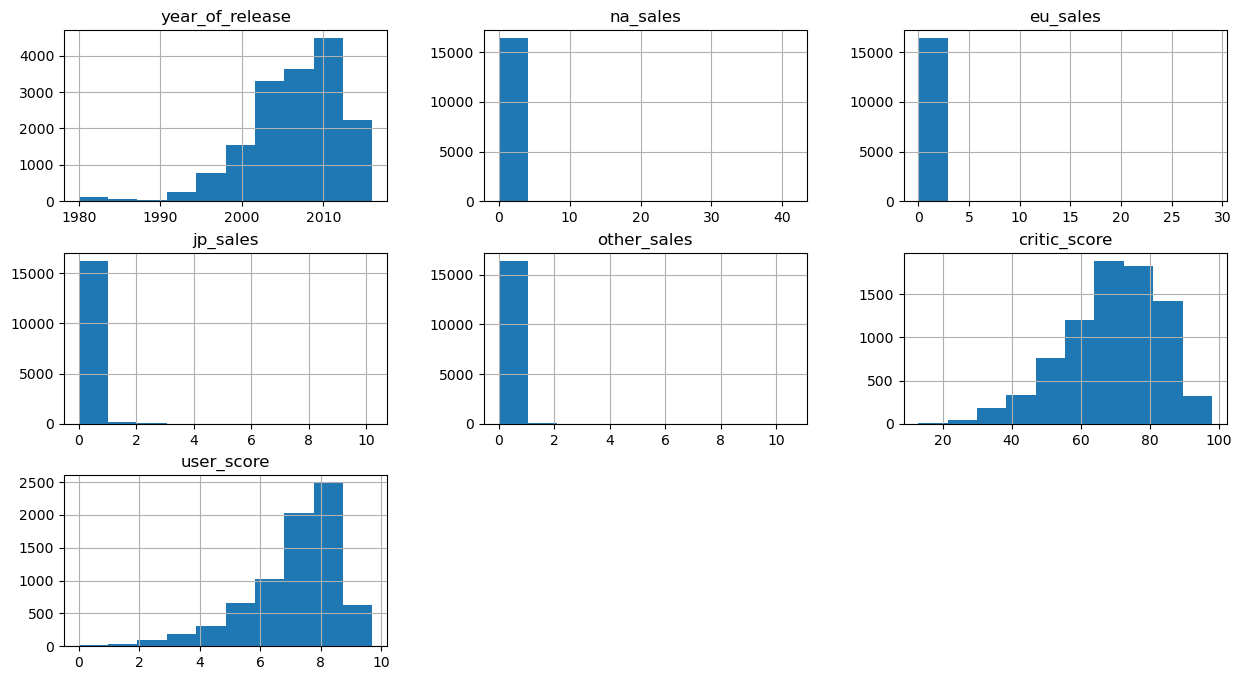

In [15]:
games.loc[:,('year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating')]\
.hist(figsize=(15,8))

The histogram indicates that there is a significantly small amount of data before 1990. Sales data also appear suspicious. Let's take a closer look at them in the context of the period after 1990.

<Axes: title={'center': 'na_sales'}, xlabel='year_of_release'>

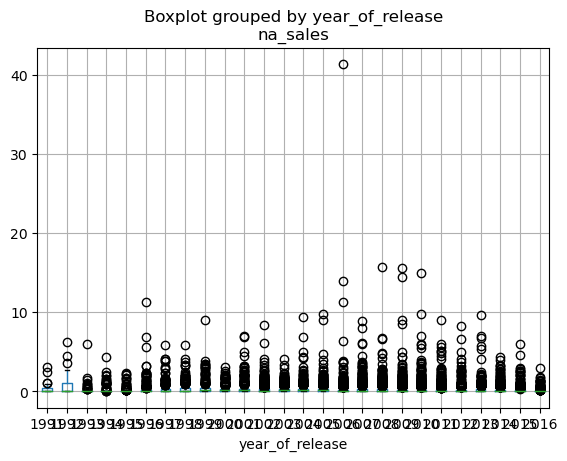

In [16]:
# create a boxplot for NA_sales by year
games.query('year_of_release>1990')\
.boxplot(column='na_sales',by='year_of_release')

<Axes: xlabel='na_sales'>

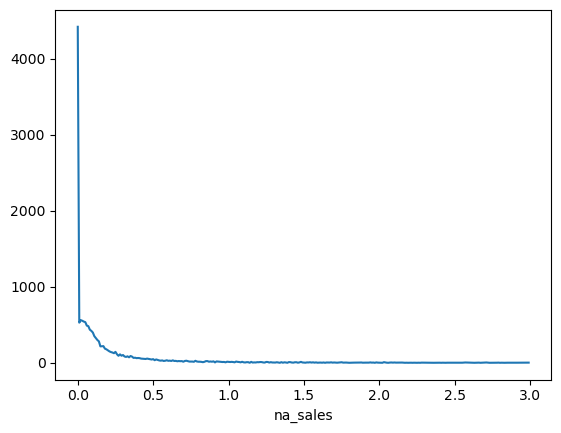

In [17]:
# create a plot based on a data subset considering the upper sales threshold
games.loc[(games['na_sales']<3)&\
          (games['year_of_release']>1990)]\
.groupby('na_sales')['na_sales'].count()\
.plot()

In [18]:
# display the count of 0 values using a loop
for area in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print(area, games.loc[games[area]==0,area].count())

na_sales 4449
eu_sales 5766
jp_sales 10300
other_sales 6492


In [19]:
games.loc[(games['na_sales']==0)&\
          (games['year_of_release']>1990),('name','na_sales','eu_sales','jp_sales')].head(10)

,name,na_sales,eu_sales,jp_sales
214,monster hunter freedom 3,0.0,0.00,4.87
339,friend collection,0.0,0.00,3.67
383,monster hunter 4,0.0,0.00,3.44
401,english training: have fun improving your skills!,0.0,0.99,2.32
426,dragon quest vi: maboroshi no daichi,0.0,0.00,3.19
526,dragon quest v: tenkuu no hanayome,0.0,0.00,2.78
559,yokai watch 2 shinuchi,0.0,0.00,2.68
626,final fantasy v,0.0,0.00,2.43
666,dragon warrior monsters,0.0,0.00,2.34
685,yokai watch busters,0.0,0.00,2.29


The suspicious spike at 0 sales in different regions likely indicates that some games sold in Japan had almost no sales in Europe and America, and vice versa. Since there are many such entries, we won't delete them. However, we'll take this fact into account in further analysis.

### Adding new columns

Calculate the total sales across all regions and write them into a new column

In [20]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<font color='BlueViolet'>
<b>Data Cleaning Summary 🟪</b></font>

Column names were converted to lowercase, and no obvious duplicates were found in the data.

**Handling Missing Values** Missing values were identified in half of the columns.
- Missing values in the 'name,' 'genre,' and 'year_of_release' columns were less than 2% and were therefore removed.
- Missing values in user ratings, critic ratings, and the rating column were significant (up to 51%) and could not be replaced or deleted.

The reasons for the above-mentioned missing values are as follows:
- Missing release years could be due to human error, where the year was forgotten or incorrectly placed (in the game title), or because the year is simply unknown (for older games) due to external circumstances.
- Missing critic and user ratings may be because no one rated or aggregated these ratings.
- Missing ratings could be related to the fact that the ESRB organization had not yet assessed these games.

**Data Type Conversion and Handling Duplicates and Anomalies**
- Data with numerical values were converted to a convenient format.
- Outdated names in the ESRB rating were replaced with current ones.
- It was observed that there were suspiciously many zero sales in each region, which is likely due to the fact that such games sold well in only one region, and there were no sales in the others. However, there were too many such rows to delete them.

**New Columns**
A new column, 'total_sales,' was added, representing the total sales of games in all regions.

## Exploratory Data Analysis

### Exploration of different data periods and their significance

<Axes: title={'center': 'The number of releases by year'}, xlabel='year_of_release', ylabel='Number of values'>

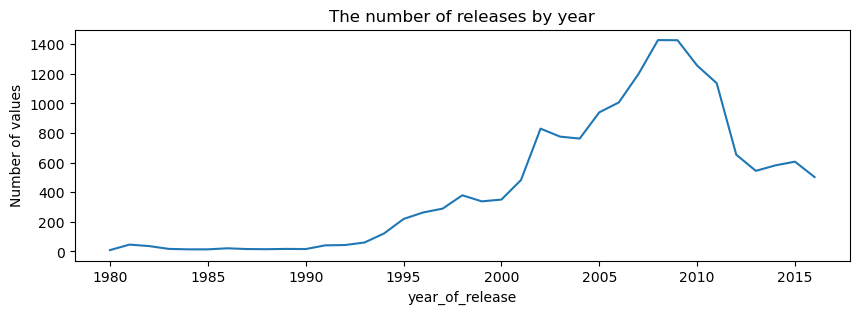

In [21]:
games.groupby('year_of_release')['name'].count().plot(figsize=(10,3),\
                                             title='The number of releases by year',\
                                             ylabel='Number of values')

<Axes: >

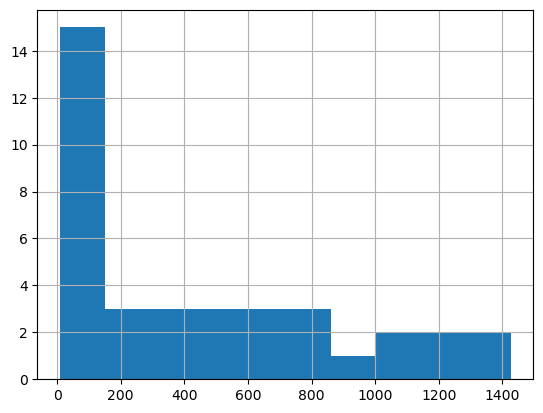

In [22]:
games.groupby('year_of_release')['name'].count().hist()

<Axes: title={'center': 'Number of values in each column by year'}, xlabel='year_of_release', ylabel='Number of values'>

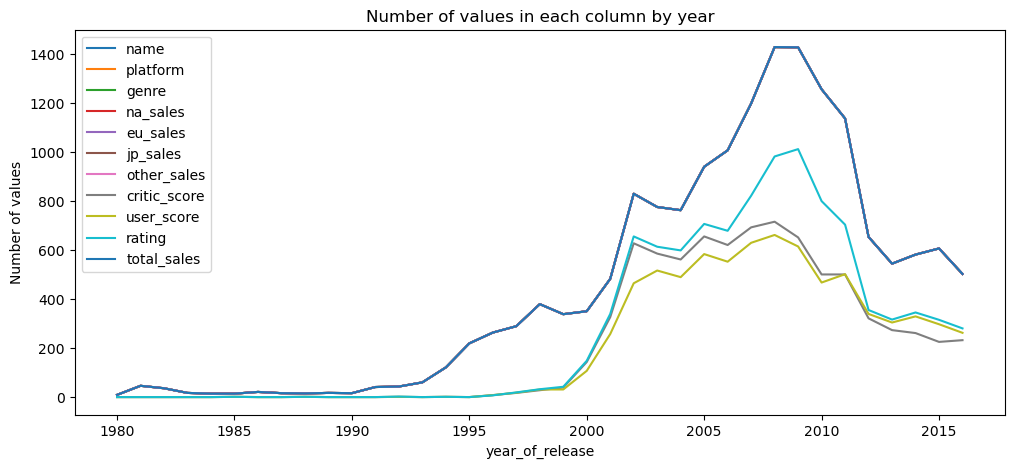

In [23]:
games.groupby('year_of_release').count().plot(figsize=(12,5),\
                                             title='Number of values in each column by year',\
                                             ylabel='Number of values')

After examining the data grouped by years, it's evident that there is almost no data for the period before 2000, with the exception of 'other sales' data, which significantly increased from 1993 onwards.

It's reasonable to consider discarding data before 1995.Indeed, it seems safe to discard data before 1995.

In [24]:
# discard data before 1995
games = games.loc[games['year_of_release']>=1995]

<Axes: xlabel='year_of_release'>

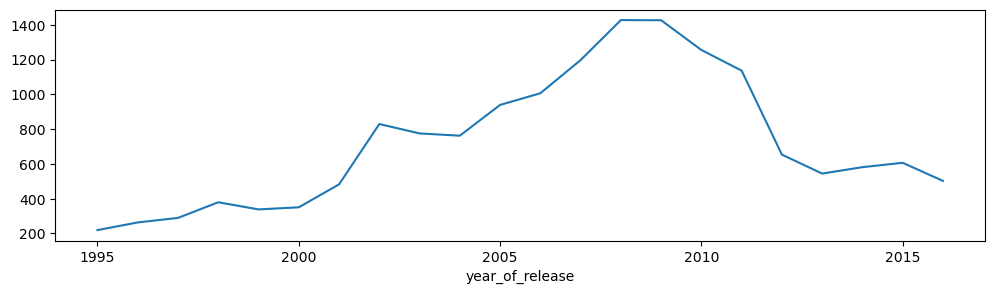

In [25]:
# create plot
games.groupby('year_of_release')['name'].count().plot(figsize=(12,3))

<font color='BlueViolet'>
<b>Conclusion🟪</b></font>

The number of computer game releases increased each year. The highest number of games was released in the period from 2007 to 2010. Starting from 2009, the number of releases significantly decreased.

### Analyzing sales dependence on platforms

Obtain the top 10 platforms with the highest sales and create a distribution of sales by year for these platforms

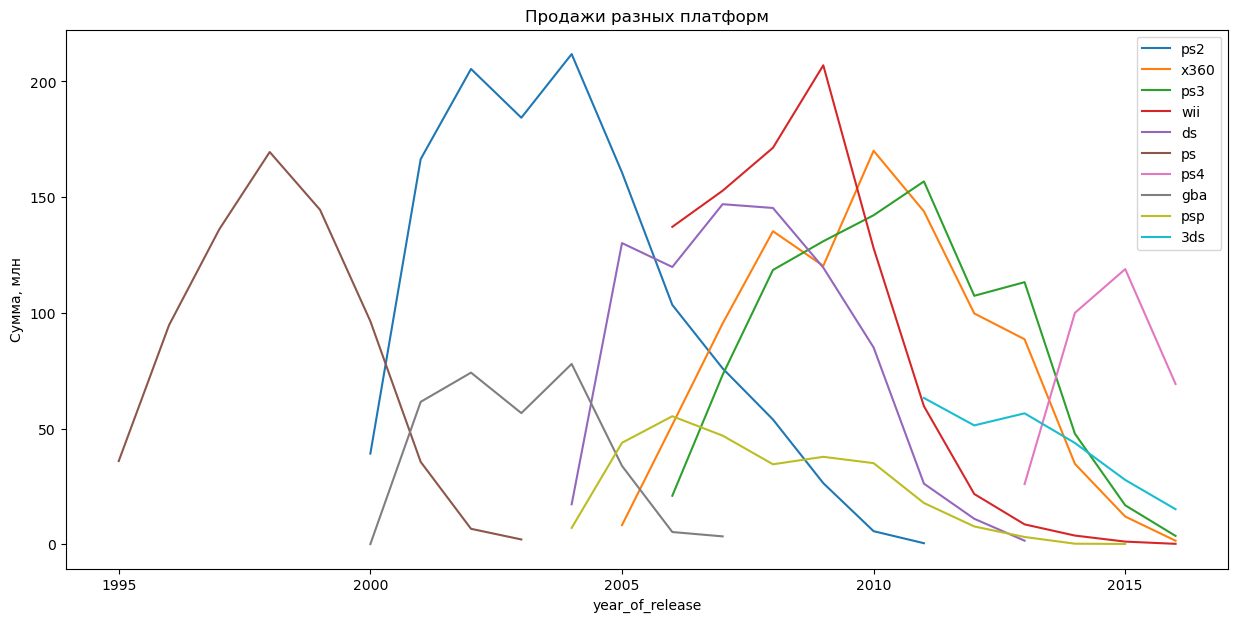

In [26]:
# obtain the top 10 platforms with the highest sales
top_platforms = games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(10)

for platf in top_platforms.index:
    games.loc[games['platform']==platf].groupby('year_of_release')['total_sales'].sum().plot(figsize=(15,7),\
                                                                                             legend=True,\
                                                                                             label=platf,\
                                                                                             title='Продажи разных платформ',\
                                                                                             ylabel='Сумма, млн')

Let's first check the years of introduction and the last release years for all platforms. After that, we can calculate the median "lifespan" of platforms among the top platforms to understand the typical duration for new and old platforms.

<Axes: >

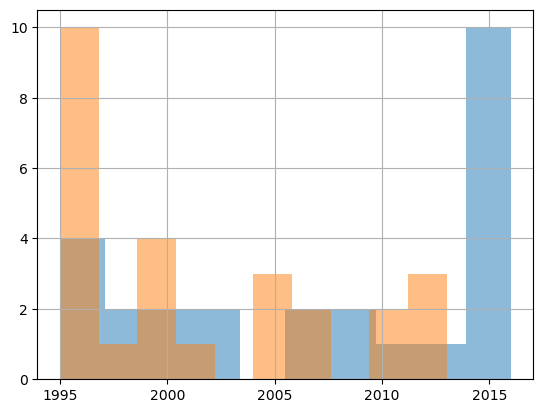

In [27]:
# generate two lists using a loop - the years when new platforms were introduced
# and the years of the last releases of platforms
born_years =[]
die_years = []
for pl in games['platform'].unique():
    born_years.append(games.loc[games['platform']==pl]['year_of_release'].min()) # первый релиз платформы
    die_years.append(games.loc[games['platform']==pl]['year_of_release'].max()) # последний релиз платформы

# create histogram
pd.Series(die_years).sort_values().hist(alpha=0.5)
pd.Series(born_years).sort_values().hist(alpha=0.5)

In [28]:
# create a loop that calculates the duration of "life" for each platform
platform_years = []
for pl in top_platforms.index:
    tab = games.loc[games['platform']==pl]['year_of_release']
    years_duration = tab.max()- tab.min()
    platform_years.append(years_duration)

# output the average duration
print('average duration',pd.Series(platform_years).median())

average duration 9.5


<font color='BlueViolet'>
<b>Conclusion🔮🟪</b></font>

Each platform has its own "lifespan" (the period during which games are released), which impacts sales. Top platforms with the highest sales on average have a lifespan of about 9 years, with sales peaking around the middle of this period, followed by a decline.

### Choosing sales-leading platforms. Forecast 2017

The relevant period for making forecasts for 2017 will be the years 2015-2016. Let's conduct our research based on this data.

In [29]:
# create a new variable and add a slice of the data for the relevant period from 2015 to 2016.
prognosys_data = games.query('(year_of_release==2015) | (year_of_release==2016)')

Now that we know the average platform "lifespan," let's identify which platforms are not at risk and will not "die" soon. We will also consider which platforms are at their sales peak in recent years.

We will examine the results and take this into account when selecting potentially profitable platforms.

In [30]:
# create a table with the top platforms by sales for the year 2015 (since data for 2016 may be incomplete)
test_top = pd.DataFrame(prognosys_data.query('year_of_release==2015')\
.groupby('platform')['total_sales'].sum()).sort_values(by='platform',ascending=False)

In [31]:
# create a table with the platforms and the number of years they have been in existence
new_platforms_life = pd.DataFrame(prognosys_data['platform'].unique(),columns=['platform'])

# create a loop counting years
new_platforms_dur =[]
# consider only the platforms with releases in the 2015-2016 timeframe
for pl in prognosys_data['platform'].unique():
    tab = games.loc[games['platform']==pl]['year_of_release']
    years_duration = tab.max()- tab.min() 
    new_platforms_dur.append(years_duration)

# add results with number of years into table
new_platforms_life['years'] = new_platforms_dur
new_platforms_life.sort_values(by='platform',ascending=False)

# combine info about years, sales 
prognosys_platforms = test_top.merge(new_platforms_life,on='platform')
prognosys_platforms.sort_values(by= 'total_sales',ascending=False)

,platform,total_sales,years
6,ps4,118.90,3
0,xone,60.14,3
9,3ds,27.78,5
7,ps3,16.82,10
2,wiiu,16.35,4
1,x360,11.96,11
8,pc,8.52,21
4,psv,6.25,5
3,wii,1.14,10
5,psp,0.12,11


According to the table, the platforms with the highest sales are PS4, XOne, 3DS, PS3, and Wii U.

However, the PS3 has been around for 10 years, and as we previously determined, the average "lifespan" of a platform is 9 years. So, it might be a good idea to exclude this platform from potentially profitable ones, as its sales are likely to decline significantly soon.

Among the "younger" platforms, only the PSV (PlayStation Vita) is present. We should take note of it. Even though its sales are relatively low, it won't disappear from the platform market anytime soon.

And since our data for 2016 might be incomplete, the top sales were determined based on the results from 2015. However, it's essential to examine whether there was growth or decline in sales for platforms between 2013 and 2016 for clarity. Let's study this on a plot

<Axes: xlabel='year_of_release'>

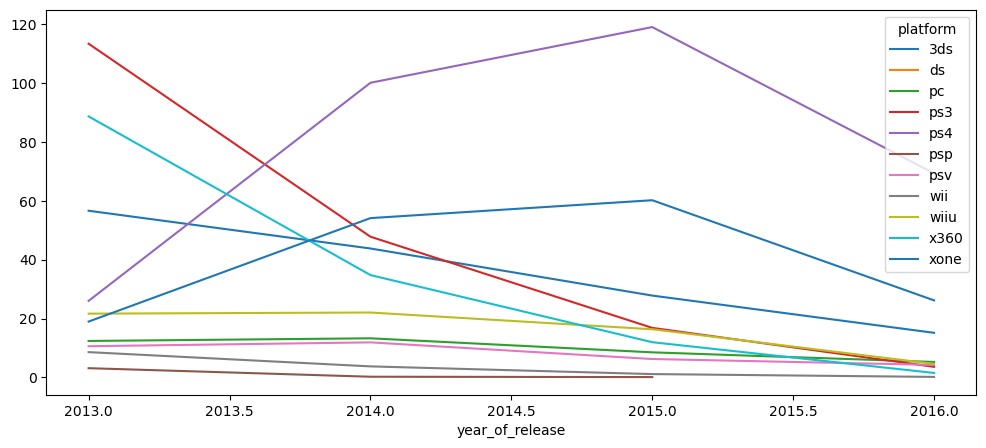

In [32]:
# create plot with different platforms
games.query('year_of_release>=2013')\
.pivot_table(index='year_of_release',values='total_sales',columns='platform',aggfunc='sum')\
.plot(figsize=(12,5))

<Axes: title={'center': 'total_sales'}, xlabel='platform'>

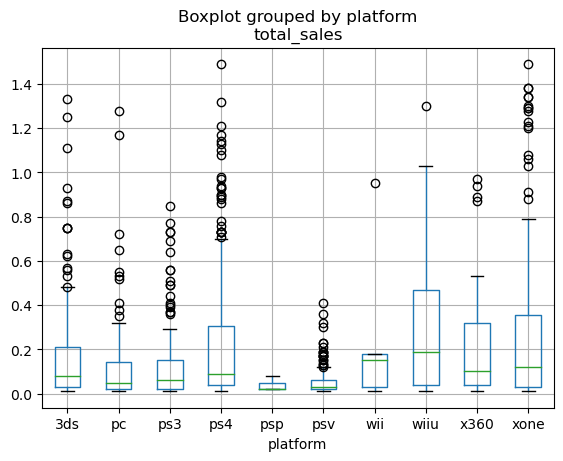

In [33]:
# create a boxplot for sales by platform
prognosys_data.query('(total_sales<1.5)')\
.boxplot(column='total_sales',by='platform')

<font color='BlueViolet'>
<b>Conclusion🟪</b></font>
Earlier, we made the conclusion to pay attention to PS4, Xbox One (XOne), 3DS, Wii U, and PSV (PlayStation Vita). Looking at the box plot, it's evident that the average sales across all platforms do not exceed 0.2 million. However, the upper "whisker" of the platforms we selected is significantly higher than the others, indicating that these platforms have more "big" sales.

The exception is the PSV (PlayStation Vita) - this platform has very low average sales in total. It might not be profitable in 2017, or it could still succeed and boost its sales.

As an alternative, we can consider the PS3 or Xbox 360. These are older platforms, but their average sales in 2015-2016 are still at a reasonable level. In 2017, their sales might be sufficient, but there is a risk of a sales decline due to the age of the platforms.

### Investigating the impact of reviews on sales

Let's examine how user and critic reviews affect sales within the most promising platforms (PS4, XOne, 3DS, Wii U). We will create a scatter plot and calculate the correlation between reviews and sales. We will also check if the same relationship exists among other platforms, if there is a dependency at all.

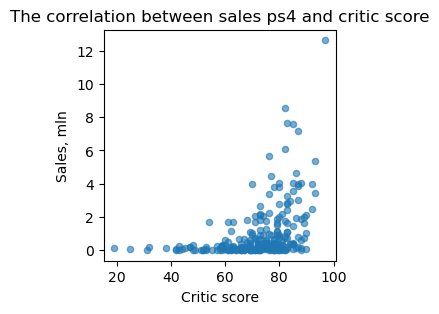

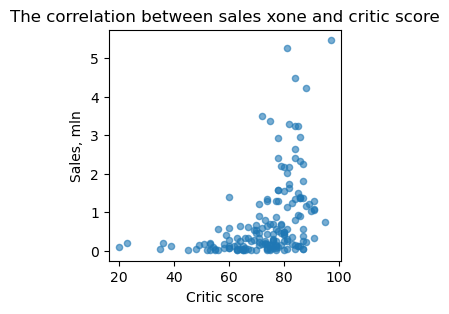

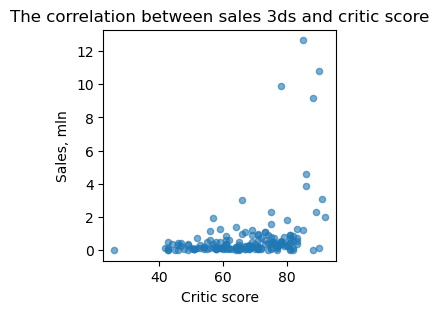

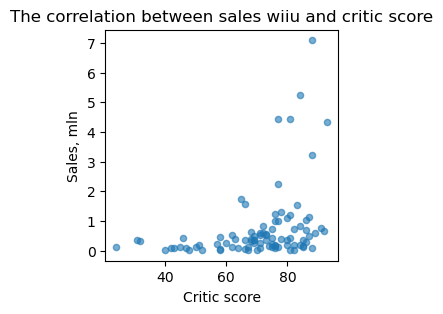

In [34]:
# create scatter plot on critic score
for pl in ['ps4', 'xone', '3ds', 'wiiu']:
    games.loc[games['platform']==pl]\
    .plot(x='critic_score', y='total_sales', \
          kind='scatter',figsize=(3,3),alpha=0.6,\
          title=f'The correlation between sales {pl} and critic score',\
          ylabel='Sales, mln',\
          xlabel='Critic score')

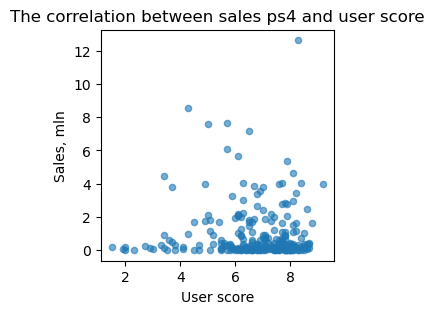

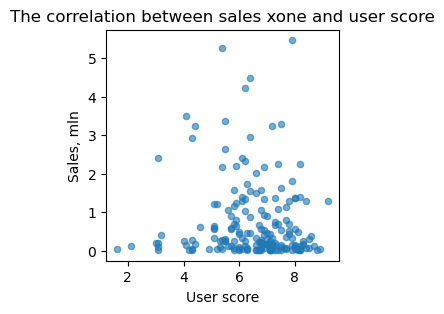

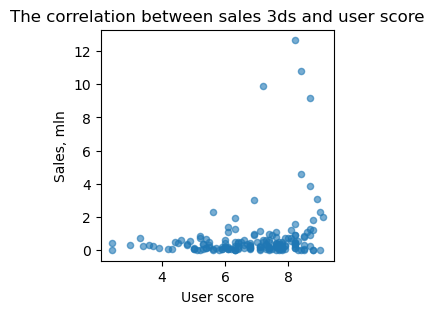

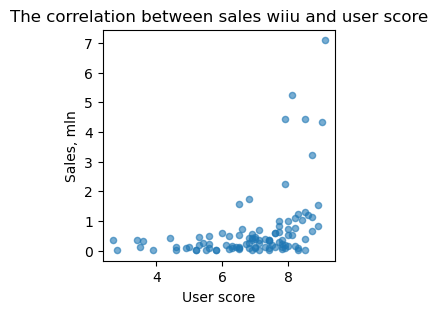

In [35]:
# create scatter plot on user score
for pl in ['ps4', 'xone', '3ds', 'wiiu']:
    games.loc[games['platform']==pl]\
    .plot(x='user_score', y='total_sales',\
          kind='scatter',figsize=(3,3),alpha=0.6,\
          title=f'The correlation between sales {pl} and user score',\
          ylabel='Sales, mln',\
          xlabel='User score')

In [36]:
# calculate the Pearson coefficient for the correlation with critic reviews
print('Pearson coefficient for the correlation with critic reviews')
for pl in ['ps4', 'xone', '3ds', 'wiiu']:
    print(pl, games.loc[games['platform']==pl,'total_sales']\
          .corr(games.loc[games['platform']==pl,'critic_score']).round(2))

# calculate the Pearson coefficient for the correlation with user reviews
print('Pearson coefficient for the correlation with user reviews')
for pl in ['ps4', 'xone', '3ds', 'wiiu']:
    print(pl, games.loc[games['platform']==pl,'total_sales']\
      .corr(games.loc[games['platform']==pl,'user_score']).round(2))

Pearson coefficient for the correlation with critic reviews
ps4 0.41
xone 0.42
3ds 0.35
wiiu 0.35
Pearson coefficient for the correlation with user reviews
ps4 -0.03
xone -0.07
3ds 0.22
wiiu 0.4


Perform the same analysis, but this time for all platforms together, rather than just the promising ones individually

<Axes: title={'center': 'The corralation between sales and user score'}, xlabel='User score', ylabel='Sales, mln'>

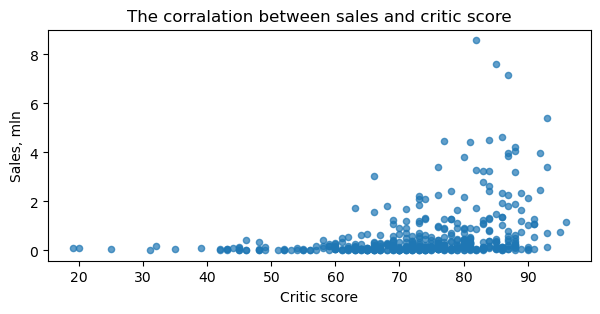

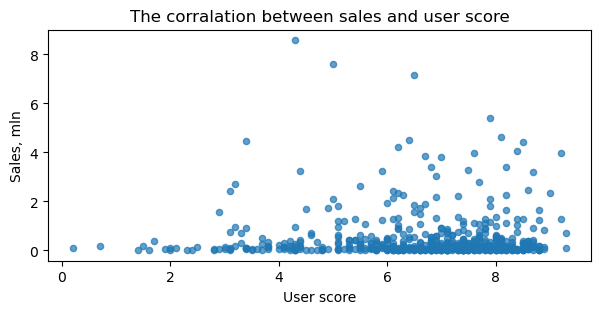

In [37]:
prognosys_data.query('total_sales<40')\
.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7,3),alpha=0.7,\
          title=f'The corralation between sales and critic score',\
          ylabel='Sales, mln',\
          xlabel='Critic score') 

# построим диаграмму рассеяния
prognosys_data.query('total_sales<40')\
.plot(x='user_score', y='total_sales', kind='scatter',figsize=(7,3),alpha=0.7,\
          title=f'The corralation between sales and user score',\
          ylabel='Sales, mln',\
          xlabel='User score') 

<font color='BlueViolet'>
<b>Вывод 🔮🟪</b></font>
It can be said that the majority of released games have ratings above 50 (critic_score) and 5 (user_score).

Moreover, among games with high ratings, "high sales" are more common, but only critic scores truly influence sales, although this varies among different platforms. According to the Pearson coefficient, there is a slight positive correlation: sales do indeed increase when critics give a positive rating, although this isn't always the case.

As for the correlation between user scores and sales among the most promising platforms:
- For the platforms PS4 and XOne, the correlation is practically absent.
- For the 3DS platform, the correlation is positive but weak, although it is higher than the correlation with critic scores.
- For the Wii U platform, the correlation is positive but not high, although it is higher than the correlation with critic scores.

### Exploration of the distribution of games by genre

Examine the overall distribution of games by genre. We will study what can be said about the most profitable genres and whether there are genres with high and low sales.

In [38]:
print('Which genres of games are the most numerous in the market over the entire period:')
print(games['genre'].value_counts().head(3))
print('Which genres of games have been the most numerous on the market since 2015:')
print(prognosys_data['genre'].value_counts().head(3))


Which genres of games are the most numerous in the market over the entire period:
action    3222
sports    2238
misc      1701
Name: genre, dtype: int64
Which genres of games have been the most numerous on the market since 2015:
action          431
role-playing    132
adventure       110
Name: genre, dtype: int64


<Axes: title={'center': 'Number of releases by genre in 2015-2016'}, xlabel='genre', ylabel='Number of releases'>

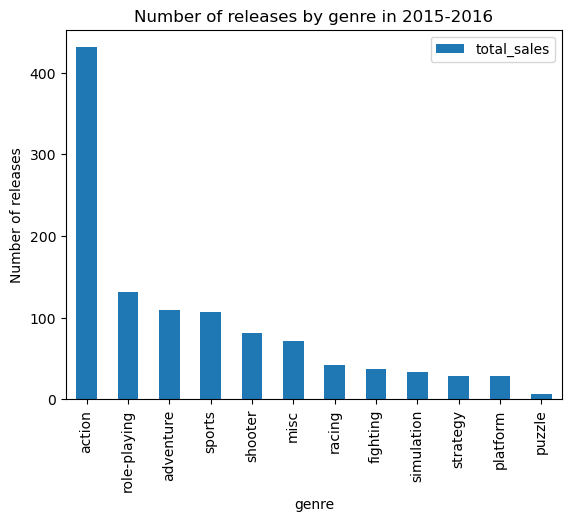

In [39]:
# create plot
prognosys_data\
.pivot_table(index='genre',values='total_sales',aggfunc='count')\
.sort_values(by='total_sales',ascending=False).plot.bar(title='Number of releases by genre in 2015-2016',\
                                                        ylabel='Number of releases')

<Axes: >

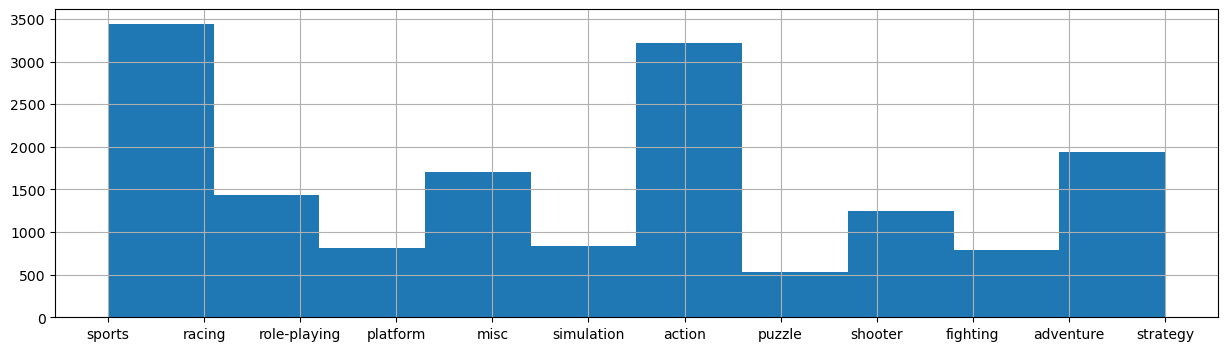

In [40]:
games['genre'].hist(figsize=(15,4))

<Axes: title={'center': 'Sales by genre in 2015-2016гг'}, xlabel='genre', ylabel='Sales, mln'>

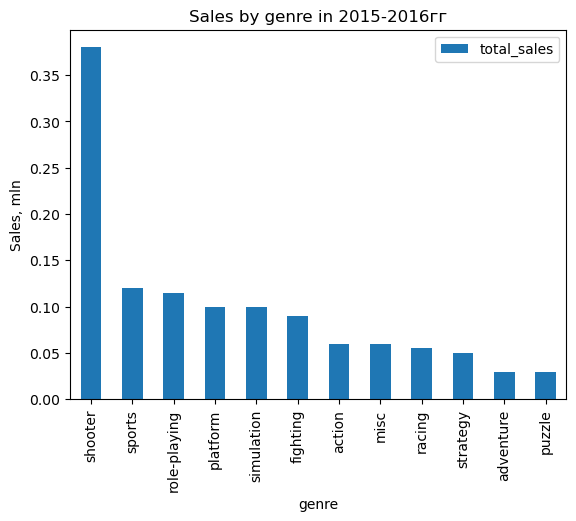

In [41]:
prognosys_data\
.pivot_table(index='genre',values='total_sales',aggfunc='median')\
.sort_values(by='total_sales',ascending=False).plot.bar(title='Sales by genre in 2015-2016гг',\
                                                        ylabel='Sales, mln')

Explore a pivot table for game sales by different genres and assess which genres are the most profitable and which ones have poor sales

In [42]:
prognosys_data\
.pivot_table(index='genre',values='total_sales',aggfunc='median')\
.sort_values(by='total_sales',ascending=False)

,total_sales
genre,
shooter,0.380
sports,0.120
role-playing,0.115
platform,0.100
simulation,0.100
fighting,0.090
action,0.060
misc,0.060
racing,0.055


<font color='BlueViolet'>
<b>Conclusion 🟪</b></font>

It's noticeable that the trends have changed over the entire period of data and in recent years (2015-2016). In the past, more games of the 'sports' and 'misc' genres were released, but now 'role-playing' and 'adventure' genres have taken their place at the top. However, the 'action' genre has consistently remained the most prominent.

In recent years, the most profitable genres were 'shooter,' 'sports,' and 'role-playing.' Meanwhile, games in the 'strategy,' 'adventure,' and 'puzzle' genres have been selling poorly.

## Creating a User Profile for Each Region

For the 2017 forecast, we used data from 2015-2016. However, will the data from this period be sufficient to build a user profile? After all, 40% of user reviews are already missing. Let's verify this as well.

In [43]:
fill_d = len(prognosys_data.loc[~prognosys_data['user_score'].isna(),'user_score'])
d = len(prognosys_data['user_score'])

print(f'reviews filled: {fill_d/d*100} %')

reviews filled: 50.45126353790613 %


50% of the rows in the 2015-2016 period have user reviews, which should be sufficient. Let's identify the top 5 most popular platforms and genres for each region (NA, EU, JP). We will compile all this information into one table and compare it.

In [44]:
# create table with results for each region
person_data = pd.DataFrame(index=[0,1,2,3,4])

for area in ['na_sales','eu_sales','jp_sales']:
    # add info about one region 
    person_area = pd.DataFrame(index=[0,1,2,3,4],columns=['platform','sales','genre','g_sales'])
    
    # bring the data into a small table
    person_area['platform'] = prognosys_data\
    .groupby('platform')[area].sum().sort_values(ascending=False).head(5).index

    person_area['sales'] = prognosys_data\
    .groupby('platform')[area].sum().sort_values(ascending=False).head(5).values

    person_area['genre'] = prognosys_data\
    .groupby('genre')[area].sum().sort_values(ascending=False).head(5).index

    person_area['g_sales'] = prognosys_data\
    .groupby('genre')[area].sum().sort_values(ascending=False).head(5).values
    
    # add the small table for one region to the overall table for all regions.
    person_data = person_data.merge(person_area,left_index=True,right_index=True)

# rename the columns for better clarity   
person_data.columns=['NA_platform','NA_sales','NA_genre','NA_g_sales','EU_platform','EU_sales','EU_genre','EU_g_sales','JP_platform','JP_sales','JP_genre','JP_g_sales']    

In [45]:
# display the final table for all regions with columns reordered for easy comparison
person_data = person_data.loc[:,('NA_platform','EU_platform','JP_platform',\
            'NA_sales','EU_sales','JP_sales',\
            'NA_genre','EU_genre','JP_genre',\
            'NA_g_sales','EU_g_sales','JP_g_sales')]
person_data

,NA_platform,EU_platform,JP_platform,NA_sales,EU_sales,JP_sales,NA_genre,EU_genre,JP_genre,NA_g_sales,EU_g_sales,JP_g_sales
0,ps4,ps4,3ds,63.86,83.54,23.55,shooter,shooter,action,48.18,40.28,23.05
1,xone,xone,ps4,50.30,28.10,12.05,action,action,role-playing,33.68,34.82,13.41
2,3ds,pc,psv,10.31,9.10,8.41,sports,sports,shooter,26.31,27.82,3.79
3,wiiu,3ds,ps3,8.86,7.39,4.97,role-playing,role-playing,misc,19.82,17.21,3.19
4,x360,ps3,wiiu,8.05,7.30,4.12,misc,racing,adventure,5.58,6.52,2.22


<Axes: title={'center': 'Sales top platforms by region'}, ylabel='Platform'>

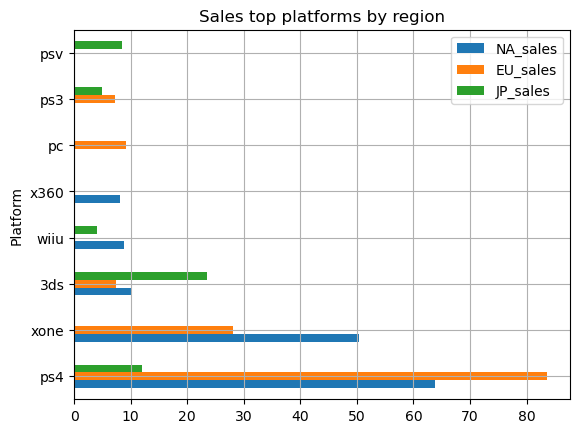

In [46]:
# create a table with the platform names from the top regions
ttt_data = pd.DataFrame(pd.concat([person_data['NA_platform'],\
                                       person_data['EU_platform'],\
                                       person_data['JP_platform']]\
                                     ).drop_duplicates())

# add sales data to the table
ttt_data = ttt_data.merge(person_data.loc[:,('NA_sales','NA_platform')],\
                          how='left',left_on=0,right_on='NA_platform')

ttt_data = ttt_data.merge(person_data.loc[:,('EU_sales','EU_platform')],\
                          how='left',left_on=0,right_on='EU_platform')

ttt_data = ttt_data.merge(person_data.loc[:,('JP_sales','JP_platform')],\
                          how='left',left_on=0,right_on='JP_platform')

# adjust the table format and remove unnecessary columns
ttt_data.index = ttt_data[0]
ttt_data.drop([0,'NA_platform','EU_platform','JP_platform'],axis=1,inplace=True)

# create plot
ttt_data.plot.barh(grid=True,\
                   title='Sales top platforms by region',ylabel='Platform')

<Axes: >

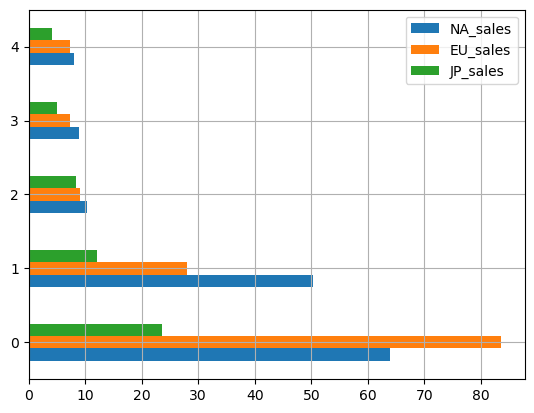

In [47]:
# create plot with rankings from 1 to 5, but without platform names for comparison
person_data.loc[:,('NA_sales','EU_sales','JP_sales')].plot.barh(grid=True)

<Axes: title={'center': 'Sales in Japan'}, ylabel='JP_platform'>

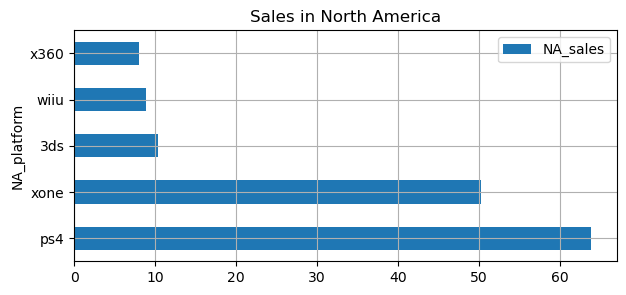

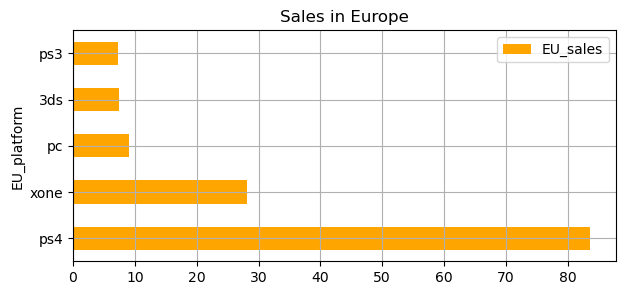

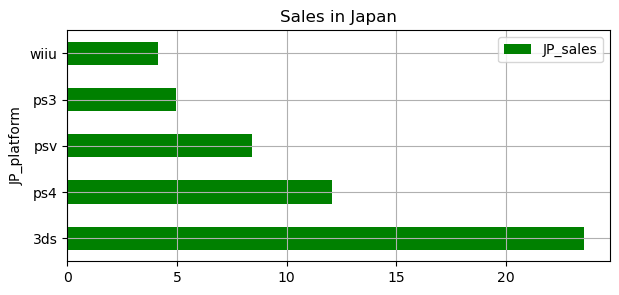

In [48]:
# visualize the results for platform sales separately for each region
person_data.plot.barh(y='NA_sales',x='NA_platform', \
                        figsize=(7, 3),grid=True,\
                       title='Sales in North America')
person_data.plot.barh(y='EU_sales',x='EU_platform', \
                        figsize=(7, 3),color='orange',grid=True,\
                       title='Sales in Europe')
person_data.plot.barh(y='JP_sales',x='JP_platform', \
                        figsize=(7, 3),color='green',grid=True,\
                       title='Sales in Japan')

<Axes: >

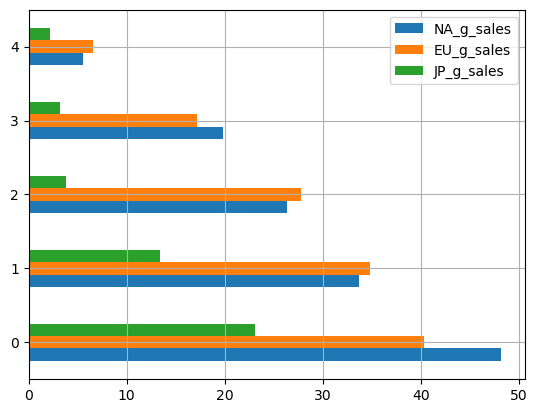

In [49]:
person_data.loc[:,('NA_g_sales','EU_g_sales','JP_g_sales')].plot.barh(grid=True)

<Axes: title={'center': 'Top genre sales in Japan'}, ylabel='Sales, mln'>

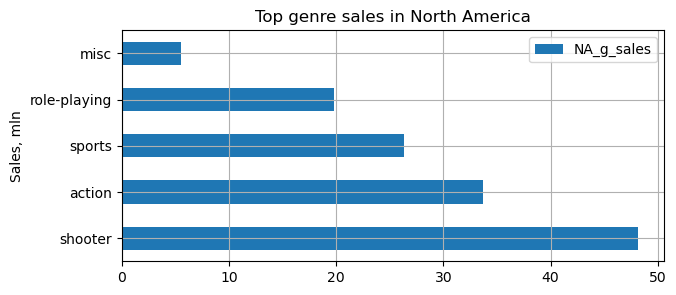

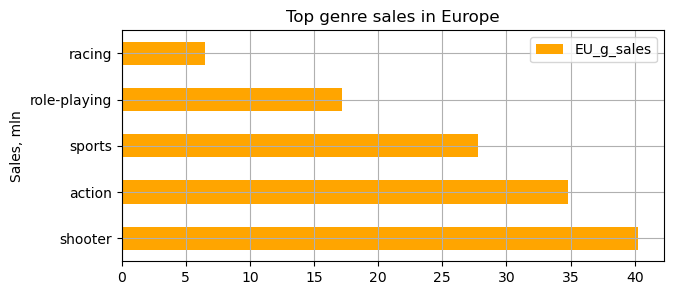

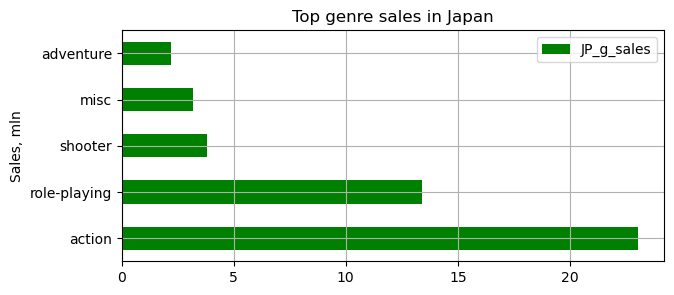

In [50]:
# visualize the results for genre sales separately for each region
person_data.plot.barh(x='NA_genre',y='NA_g_sales', figsize=(7,3),grid=True,\
                     title='Top genre sales in North America',\
                     ylabel='Sales, mln')
person_data.plot.barh(x='EU_genre',y='EU_g_sales', figsize=(7,3),grid=True,\
                     title='Top genre sales in Europe',color='orange',\
                     ylabel='Sales, mln')
person_data.plot.barh(x='JP_genre',y='JP_g_sales', figsize=(7,3),grid=True,\
                     title='Top genre sales in Japan',color='green',\
                     ylabel='Sales, mln')

From the table above, it's evident that the user profile trends in North America and Europe are quite similar:

- In both regions, the top two platforms are PS4 and XOne.
- The top genres in both regions are nearly identical, with only the 5th place differing.
- Even the sales volume of the top genres in America and Europe is very similar.

Some important observations regarding Japan:

- Video game sales in Japan are generally lower than in America or Europe, often by a factor of two or more.
- The PS4 platform is in the top rankings in Japan, taking the 2nd place, but it's surpassed by the 3DS, which is much less popular in other regions.
- Any genre that ranks higher in Japan still has more sales in America and Europe, thanks to the overall higher sales volumes in these regions.

**Check whether the ESRB rating influences sales in a specific region**

First of all, check if there is sufficient data on ESRB ratings for the period 2015-2016

In [51]:
fill_r = len(prognosys_data.loc[~prognosys_data['rating'].isna(),'rating'])
r = len(prognosys_data['rating'])

print(f'filled info about rating: {fill_r/r*100} %')

filled info about rating: 53.70036101083032 %


Explanation of game ratings:

- "E" (Everyone) - Suitable for all ages.
- "E10+" (Everyone 10 and older) - Suitable for ages 10 and older.
- "T" (Teen) - Suitable for ages 13 and older.
- "M" (Mature) - Intended for adults, materials are not suitable for those under 17 years old.

In [52]:
rating_sales = prognosys_data\
.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')\
.loc[['E','E10+','T','M'],:] #display it on the screen in an organized manner - the age restriction is increasing.

# add sales by genre without rating
rating_sales.loc['Unknown','na_sales'] = prognosys_data.query('rating.isna()')['na_sales'].sum()
rating_sales.loc['Unknown','eu_sales'] = prognosys_data.query('rating.isna()')['eu_sales'].sum()
rating_sales.loc['Unknown','jp_sales'] = prognosys_data.query('rating.isna()')['jp_sales'].sum()

# display results
rating_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,34.83,5.25,26.59
E10+,11.54,3.27,17.87
T,20.32,7.70,22.86
M,45.54,4.29,47.03
Unknown,35.71,32.89,37.44


<Axes: xlabel='rating'>

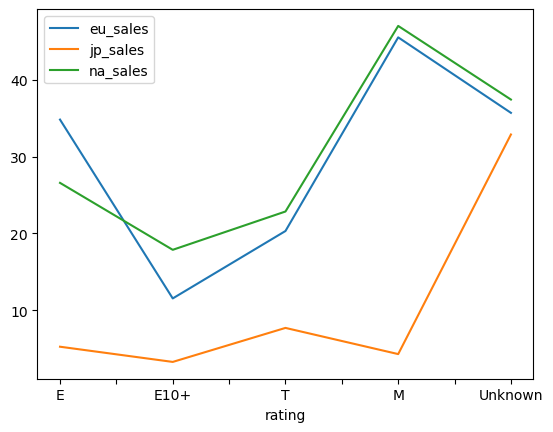

In [53]:
# посмотрим результат на графике
rating_sales.plot()

<font color='BlueViolet'>
<b>Conclusion 🟪</b></font>

The user profile for North America and Europe is very similar, with differences mainly in the 3rd to 5th positions in the top platforms and in sales volumes. In North America, they might be higher in some cases, but overall sales volumes are similar, both in terms of platforms and genres.

Japan, on the other hand, differs significantly from these regions in terms of platforms, genres, and sales volumes. Shooters and sports games are less popular in Japan, with action and role-playing games taking the lead. However, regardless of these differences, action and role-playing games would still be more prospective to sell in North America and Europe, as sales volumes are generally 2 or more times higher in these regions compared to Japan.

In North America and Europe, game ratings have a similar impact on sales, with the most popular games being either "Everyone" (including those for younger audiences) or "Mature" (for ages 17 and older). However, in both these regions and Japan, there are a significant number of sales for games with unknown ratings, with Japan having the largest sales in this category.

## Hypothesis Testing

### Hypothesis №1: The average user ratings for the Xbox One and PC platforms are the same

Since only 50% of the reviews are filled in our data, we'll consider that we are always working with a sample from the population. We will proceed with this assumption.

Null Hypothesis: The average user ratings for the Xbox One and PC platforms are the same.

Alternative Hypothesis: The average user ratings for the Xbox One and PC platforms are NOT the same.

In [56]:
sample_1 = prognosys_data.loc[(prognosys_data['platform']=='xone')&\
                     (~prognosys_data['user_score'].isna()),'user_score']
sample_2 = prognosys_data.loc[(prognosys_data['platform']=='pc')&\
                     (~prognosys_data['user_score'].isna()),'user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-value: ', results.pvalue)

alpha = .1 # critical level of statistical significance

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value:  0.2778542084733835
Failed to reject the null hypothesis


### Hypothesis №2: The average user ratings for the Action and Sports genres are different.

Null Hypothesis: The average user ratings for the Action and Sports genres are equal.

Alternative Hypothesis: The average user ratings for the Action and Sports genres are not equal.

In [57]:
sam_1 = prognosys_data.loc[(prognosys_data['genre']=='action')&\
                     (~prognosys_data['user_score'].isna()),'user_score']
sam_2 = prognosys_data.loc[(prognosys_data['genre']=='sports')&\
                     (~prognosys_data['user_score'].isna()),'user_score']

result_sam = st.ttest_ind(sam_1, sam_2, equal_var = True)
print('p-value: ', result_sam.pvalue)

alpha = .1 # критический уровень статистической значимости

if result_sam.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value:  1.0012846807938657e-13
Reject the null hypothesis


<font color='BlueViolet'>
<b>Conclusion 🟪</b></font>
    
Hypothesis №1:
Obtained p-value: 0.2778542084733835
Failed to reject the null hypothesis - The average user ratings for the Xbox One and PC platforms are equal.

Hypothesis №2:
Obtained p-value: 1.0012846807938657e-13
Reject the null hypothesis - The average user ratings for the Xbox One and PC platforms are not equal.

## General Conclusion on the conducted work and the results obtained

A CSV file with historical data from open sources regarding game sales, user and expert ratings, genres, and platforms was obtained. During data preprocessing, missing values and duplicates were identified and addressed. The following key points emerged from the data preprocessing:

- Missing data in the "name," "genre," and "year_of_release" columns accounted for less than 2% and were thus removed.
- Missing data in user ratings, critic ratings, and ESRB ratings were significant (up to 51%) and could not be replaced or removed.
- Numerical data were formatted for convenience.
- Outdated ESRB rating names were updated to current ones.
- It was observed that each region had a suspiciously high number of zero sales, likely due to certain games being popular in one region but not in others. However, there were too many such rows to remove.

The causes of the missing values were often related to human factors (users and critics not providing ratings) or a lack of information (ESRB organization not yet rating the game).

The main goal was to identify patterns that determine the success of a game, allowing for betting on potentially popular products and planning advertising campaigns. The evaluation included:

- Analysis of different data periods and their value.
- Examination of the relationship between sales and platforms.
- Evaluation of the impact of reviews on sales.
- Assessment of the distribution of games by genre.

Key findings from the analysis:

- Active sales growth was observed until 2009, followed by a significant decline.
- The highest number of games was released from 2007 to 2010.
- Platforms typically have a lifespan of 9 years, with peak sales occurring around the middle of this period.
- Most released games have ratings above 50 out of 100 (critic ratings) and 5 out of 10 (user ratings).
- Sales tend to increase if critics provide positive ratings, although the correlation is not high.
- Correlation between sales and user ratings is positive and relevant for potentially profitable platforms only for 3DS and Wii U, but the correlation is not high.
- The "action" genre has been popular over time, but earlier, there were more "sports" and "misc" games. From 2015, "role-playing" and "adventure" took their place.

The primary data for further analysis were based on the 2015-2016 period. As a result of this analysis, a forecast was made for potentially profitable products in 2017.

**Platforms**:

- Promising platforms: PS4, XOne, 3DS, Wii U.
- Average sales do not exceed 0.2 million, but these platforms have many "high" sales.
- Potentially promising platforms: PSV, PS3, X360.
  - PSV has low sales, but it is a young platform and may see sales growth in the future.
  - PS3 and X360 have good sales, but they are older platforms, and there is a risk of declining sales or discontinuation.

**Genres**:

- Most profitable genres: 'shooter,' 'sports,' 'role-playing.'
- Least profitable: 'strategy,' 'adventure,' 'puzzle.'

**User Profiles by Region**:

User profiles for America and Europe are quite similar:
- Most popular platforms: PS4 and XOne (80% of sales).
- Most popular genres: shooter, action, sports (80% of sales).
- The most popular games have "Everyone" ratings and "Mature" ratings (17 and older).

The user profile for Japan is notably different:
- Most popular platforms: 3DS, PS4, and PSV (70% of sales).
- Most popular genres: action, role-playing, shooter (80% of sales).
- Sales for all rating categories are roughly the same, with a slight preference for the "Teen" rating (13 and older).

However, in all regions, there are a significant number of sales for games with unknown ratings, with Japan having the most sales in this category.

Additionally, a **statistical analysis of the data** was conducted, leading to the following outcomes:
- Hypothesis #1 was not rejected - The average user ratings for the Xbox One and PC platforms are equal.
- Hypothesis #2 was rejected - The average user ratings for the Xbox One and PC platforms are not equal.

Hypothesis #1: Obtained p-value: 0.2778542084733835. Failed to reject the null hypothesis - The average user ratings for the Xbox One and PC platforms are equal.

Hypothesis #2: Obtained p-value: 1.0012846807938657e-13. Reject the null hypothesis - The average user ratings for the Xbox One and PC platforms are not equal.